The following notebook will be the exploratory data analysis of the rating data set 
that is created in book_analysis. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

#### Load data

In [2]:
data_path = 'D:\\PycharmProjects\\springboard\\data\\'
rating = pd.read_csv(f'{data_path}book_rating.csv')

# data info
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270167 entries, 0 to 270166
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 270167 non-null  object 
 1   book_title           270167 non-null  object 
 2   book_author          270167 non-null  object 
 3   year_of_publication  270167 non-null  object 
 4   publisher            270167 non-null  object 
 5   book_rating          270167 non-null  float64
 6   total_rating         270167 non-null  float64
dtypes: float64(2), object(5)
memory usage: 14.4+ MB


d:\pycharmprojects\springboard\venv\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Create book_title_length column
# Note that we also include white space in the title as without it the title doesnt 
# make much sense!
rating['book_title_length'] = rating['book_title'].str.len()

In [4]:
# Top publisher by number of books
top_20_publisher = list(rating.publisher.value_counts()[:20].index)

# Set pattern for top 20 publisher
pat = '|'.join(top_20_publisher)

# Columns for top 20 publishers
rating['top_20_publisher'] = rating['publisher'].str.contains(f'({pat})').fillna(value=False)
rating['top_20_publisher'] = rating['top_20_publisher'].astype('category')
rating[rating['top_20_publisher'] == True].groupby('publisher')['ISBN'].count().sort_values(ascending=False)

d:\pycharmprojects\springboard\venv\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


publisher
Harlequin                      7524
Silhouette                     4190
Pocket                         3896
Ballantine Books               3775
Bantam Books                   3640
                               ... 
Scholastic 10x8 paperback         1
Scholastic 8x6 paperback          1
Scholastic Apple Paperbacks       1
Scholastic Audio Cassette         1
A Disney/Bantam Books             1
Name: ISBN, Length: 228, dtype: int64

In [5]:
# Top authors list
top_authors = ['Stephen King', 'J.K. Rowling', 'J. K. Rowling', 'James Patterson', 'John Grisham', 'Dan Brown',
               'Michael Wolff', 'Nora Roberts', 'Danielle Steel', 'Rick Riordan', 'Tolkien']

# Set pattern for top authors
pat = '|'.join(top_authors)

# Top author columns
rating['top_author'] = rating['book_author'].str.contains(f'({pat})', regex=True).fillna(value=False)
rating['top_author'] = rating['top_author'].astype('category')
top_authors_rating = rating[rating['top_author']==True].groupby('book_author')['ISBN'].count().sort_values(ascending=False)

Text(0.5, 1.0, 'Best selling authors and number of books')

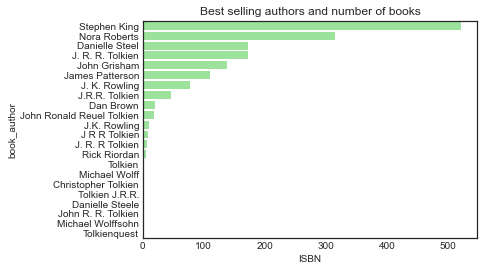

In [17]:
sns.barplot(y=top_authors_rating.index, x=top_authors_rating, color='lightgreen')
plt.title('Best selling authors and number of ISBN')

#### Exploratory Data Analysis

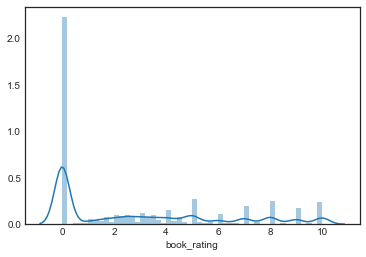

In [7]:
# Rating distribution
sns.distplot(rating.book_rating)

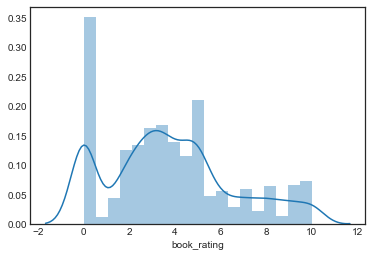

In [8]:
# Rating Among top authors 
sns.distplot(rating[rating['top_author']==True].book_rating)

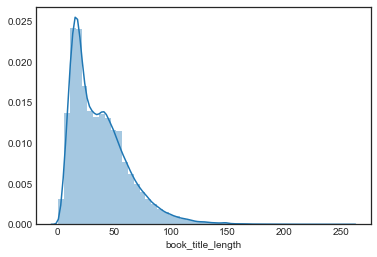

In [9]:
# Book title length distribution
sns.distplot(rating.book_title_length)